### On the Tips dataset

The tips dataset is a dataset based on the tips left by a selection of 244 dining parties, taking account of the following variables:
 - total_bill (the total cost of the bill)
 - tip
 - sex
 - smoker
 - day (the dataset seems to have only sampled on Thursday through Sunday)
 - time (whether this was at lunch or dinner time)
 - size (how many people were in the party)
 
 We shall perform some analyses.

First, we need to set up python for our calculations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips') # The tips dataset already comes with seaborn, but to confirm it is the same 
                                # as the dataset we have just downloaded (which we have called somethingelse.csv),
                                # we compare the two datasets and take the sum to see how many "True"s we get.
                                # As each parameter returns the value 244, and we know there were 244 dining parties,
                                # we know the datasets match at every point, which is reassuring!
tips2=pd.read_csv('somethingelse.csv')
comparison=(tips == tips2)
comparison.sum()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [2]:
#tips # We can uncomment this and run it if we wish to see the extended list, but there is no need, so we just use
      # the following to look at a small selection, to check that the data format 'looks' right.
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Now we have python set up, and the dataset imported, it is time look at some of its basic properties, before conducting any in-depth analysis.

In [3]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
from collections import Counter as C

for i in ['sex','smoker','day','time','size']:
    print (C(tips.iloc[:][i]))

Counter({'Male': 157, 'Female': 87})
Counter({'No': 151, 'Yes': 93})
Counter({'Sat': 87, 'Sun': 76, 'Thur': 62, 'Fri': 19})
Counter({'Dinner': 176, 'Lunch': 68})
Counter({2: 156, 3: 38, 4: 37, 5: 5, 1: 4, 6: 4})


It is perhaps surprising how few people eat out on their own, and how unpopular Friday was, but aside from that there is nothing particularly remarkable about this data when taken by itself. Perhaps our analyses will reveal some interesting correlations later.

### Univariate analysis
We first give a brief overview of the individual variables.

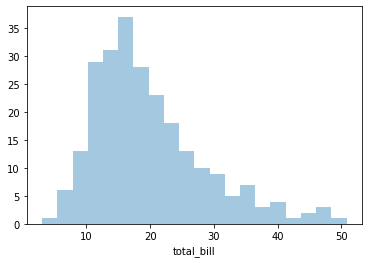

In [5]:
sns.distplot(tips['total_bill'],kde=False,bins=20) # kde = False means the y-xis
                                                                     # provides the actual number
                                                                     # bins = 20 means the entries are
                                                                     # divided into 20 slots according
                                                                     # to size
plt.show()

The mode total_bill appears to be around 15 dollars (presumably), and as we see in the next graph, most tips are between 2 and 4 dollars.

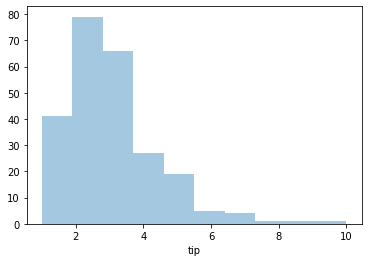

In [6]:
sns.distplot(tips['tip'],kde=False,bins=10);
plt.show()

It looks as though the total_bill and tips have a similar distribution, which might vaguely suggest the two are closely related. We will perform some further bivariate analysis later, but for now, let us construct a new data column tip_percent containing the percentage of the meal each tip equated to. We will not add this to the dataset just yet, but it might prove useful for analysis later.

In [7]:
tip_percent=[]
for i in range(tips.shape[0]): # this iterates over all of the rows in tips
    tip_percent.append(tips.loc[i][1]/tips.loc[i][0]*100) # this divides the second entry of a row (the tip) 
                                                      # by the first entry (the total_bill) and multiplies 
                                                      # by 100 to give the percentage
    
#tip_percent # remove comment to view list

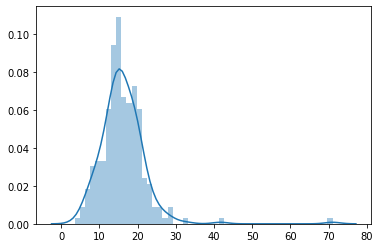

In [8]:
sns.distplot(tip_percent,kde=True,bins=50)
plt.show()

This graph shows that the tip percent is between about 10 and 20 percent in the overwhelming majority of cases, which strongly suggests that there is correlation (unsurprisingly) between tip size and total bill. We will expect later analyses to confirm this. 

Now we add the tips_percent to our dataset.

In [9]:
tips.insert(7,"tip_percent",tip_percent,True)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


### Bivariate analysis
Now that we have had our first hint of a correlation, it is time to investigate further to see what else might affect tip size. First, we shall analyse something completely irrelevant, for curiosity. 

Are women or men (at least in this sampe set) more likely to be smokers?

My first attempt, I shall leave in for amusement value, because I spent twenty minutes updating my anaconda to get this function to work, and then very obviously got this completely useless graph.

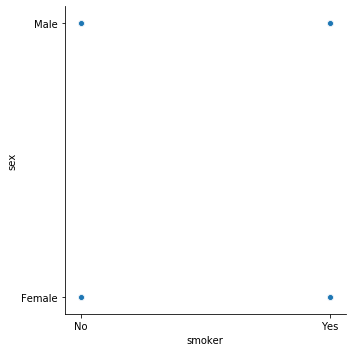

In [10]:
sns.relplot(x='smoker', y='sex',data=tips)
plt.show()


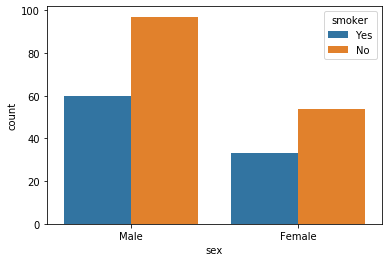

In [11]:
smoker_sex=sns.countplot(x='sex', hue='smoker',data=tips)
plt.show()

So about two fifths of both men and women smoke. Let us briefly run a few more simulations, leaving the interesting tips, tip_percent and total_bill aside.


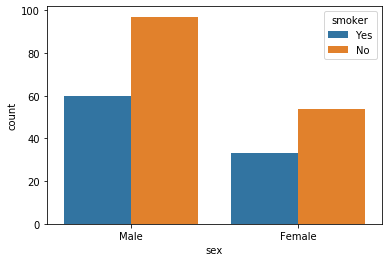

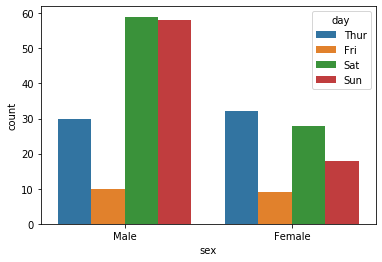

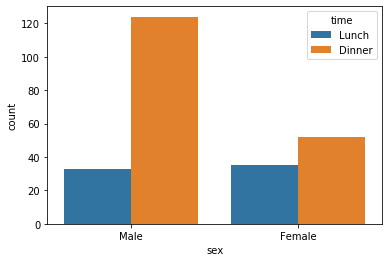

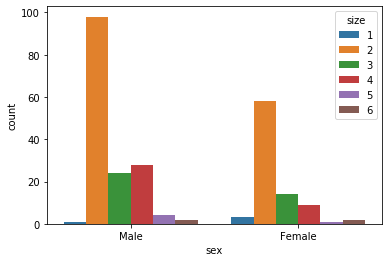

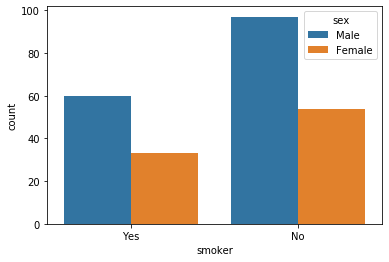

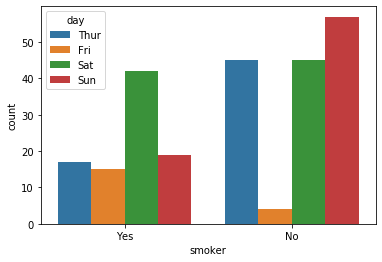

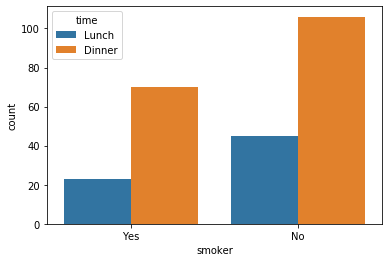

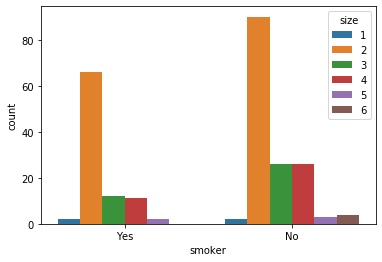

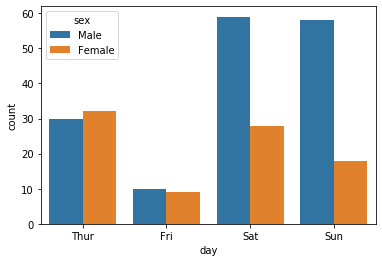

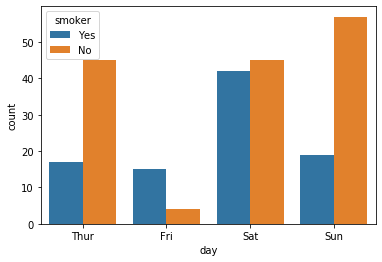

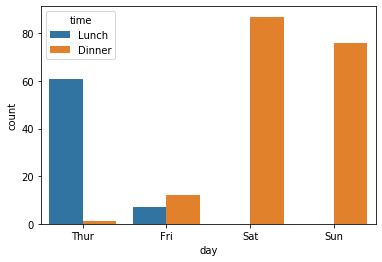

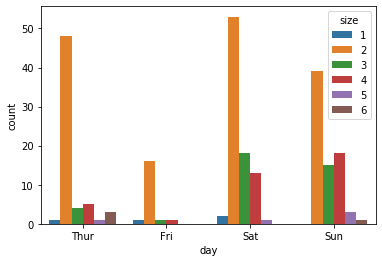

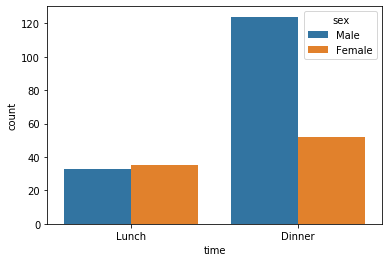

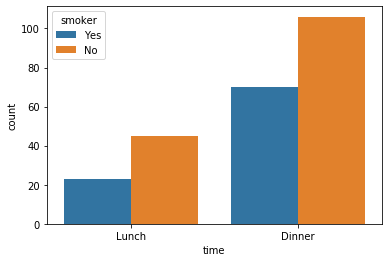

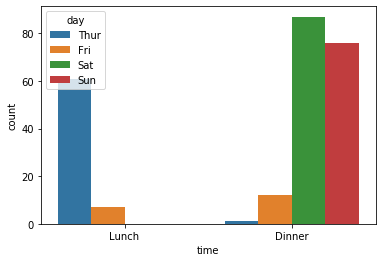

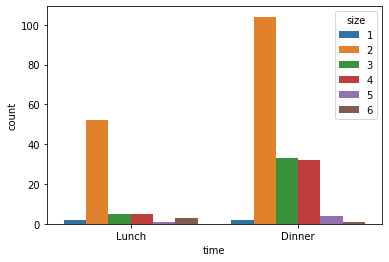

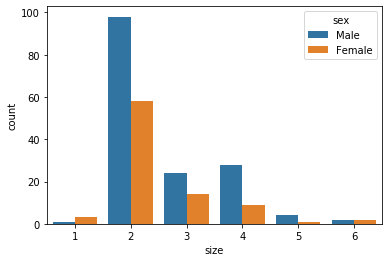

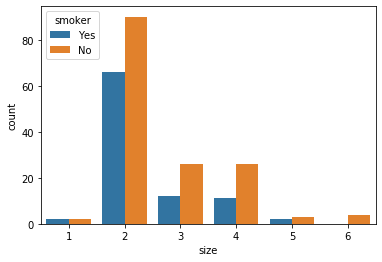

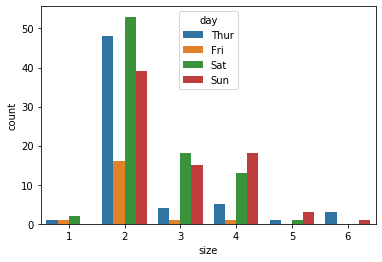

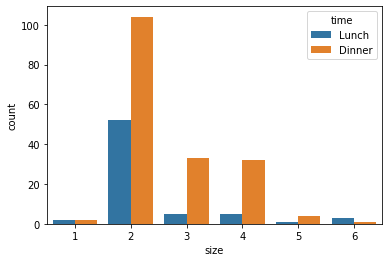

In [12]:
for i in ['sex','smoker','day','time','size']:
    for j in ['sex','smoker','day','time','size']:
        if not i==j:
            sns.countplot(x=i, hue=j,data=tips)
            plt.show()

We can see that roughly the same portion of men and women are smokers, and that men are much more likely to buy dinner than lunch. Women are more likely to eat here on Thursdays, men on the weekend. Most parties were groups of two, for both men and women. Nobody bought lunch on the weekend. Smokers prefer Saturdays, and most people prefer dinner.  People are less likely to smoke if they are with more than one other person, and are slightly more inclined to smoke at lunchtime. Sunday is a better day for groups. 

That is all well and good, but the money is what we really care about.

#### Show me the money!

First, we simply plot the total_bill and tip values against each of the other variables in the data set, one at a time.

In [13]:
tips[['total_bill','tip','size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Hmm. This seems to suggest the correlation is not very strong between either the total_bill and the tip, or the total_bill and the size (or number of people in the group) - both of which are surprising.

Now we compare the three money variables against the others. 

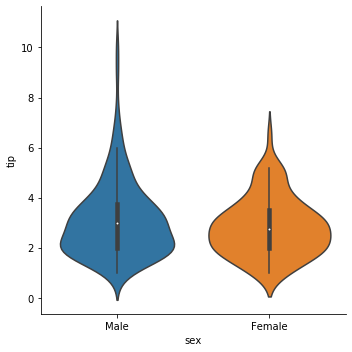

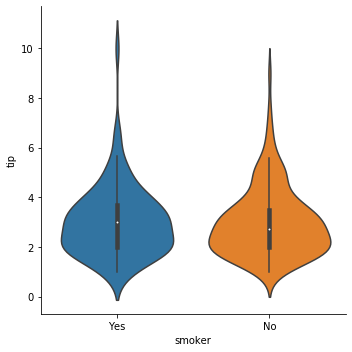

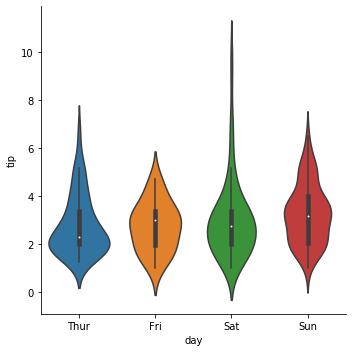

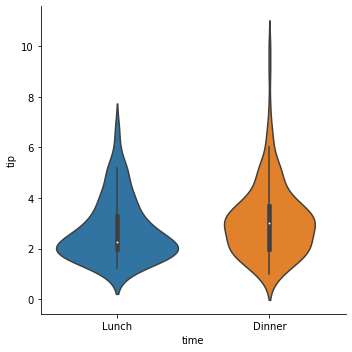

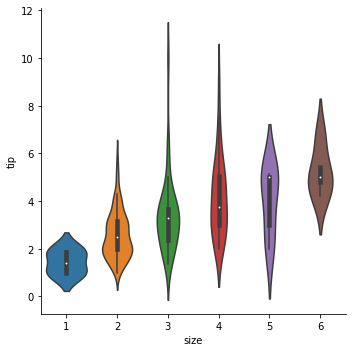

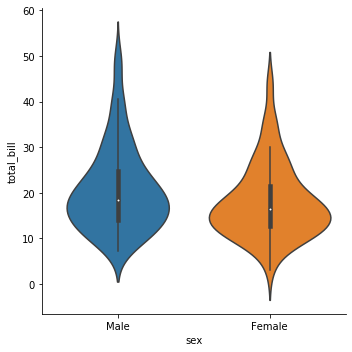

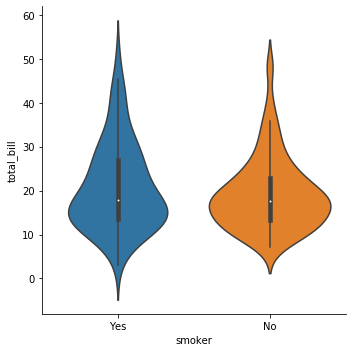

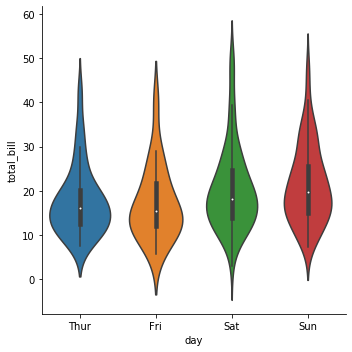

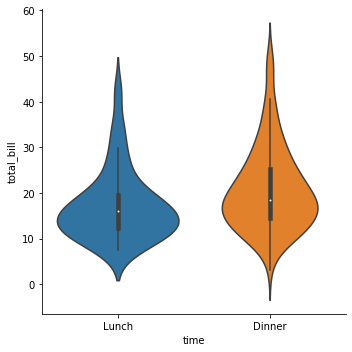

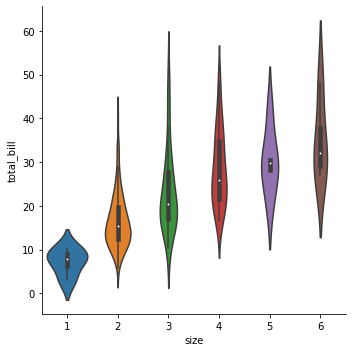

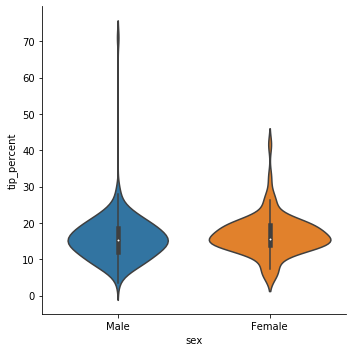

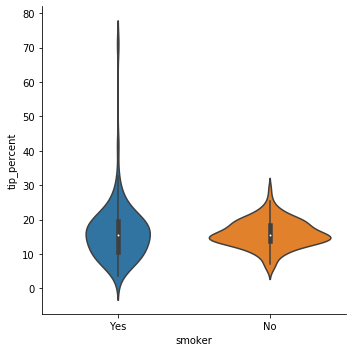

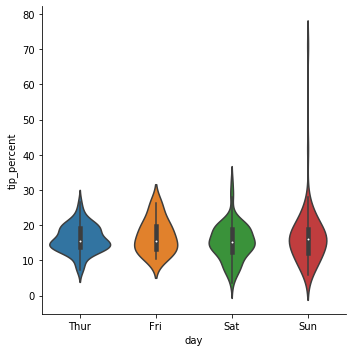

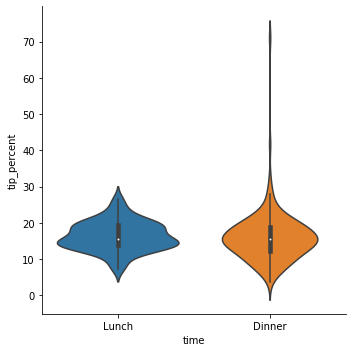

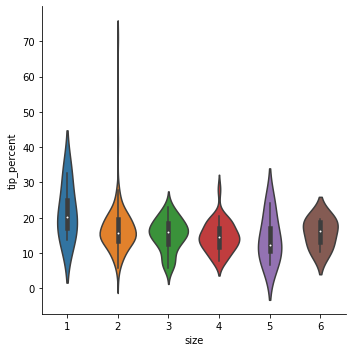

In [14]:
for i in ['tip','total_bill','tip_percent']:
    for j in ['sex','smoker','day','time','size']:
        sns.catplot(y=i, x=j, kind='violin', data=tips)
        plt.show()

The very long narrow tails on the tip graphs (those with tip on the y-axis) here might indicate that we have an almost outlier - Specifically: a male smoker who bought dinner on a Saturday for a group of three people left the largest tip.

Let us arrange the data by decreasing tip size and see.

In [15]:
#arr = arr[arr[:,n].argsort()]
#tip_sorted_tips=tips[tips['1'].argsort()]
tip_sorted_tips=tips.sort_values(by='tip', ascending=False)
tip_sorted_tips

,total_bill,tip,sex,smoker,day,time,size,tip_percent
170,50.81,10.00,Male,Yes,Sat,Dinner,3,19.681165
212,48.33,9.00,Male,No,Sat,Dinner,4,18.621974
23,39.42,7.58,Male,No,Sat,Dinner,4,19.228818
59,48.27,6.73,Male,No,Sat,Dinner,4,13.942407
141,34.30,6.70,Male,No,Thur,Lunch,6,19.533528
...,...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
236,12.60,1.00,Male,Yes,Sat,Dinner,2,7.936508
111,7.25,1.00,Female,No,Sat,Dinner,1,13.793103
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290


Similarly, looking at the tip_percent graphs above, we might conjecture from the long tails that the most generous tip was from a male smoker at dinner for two on Sunday. 
Let us check:

In [16]:
tip_sorted_tips=tips.sort_values(by='tip_percent', ascending=False)
tip_sorted_tips

,total_bill,tip,sex,smoker,day,time,size,tip_percent
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,6.565988
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
57,26.41,1.50,Female,No,Sat,Dinner,2,5.679667
102,44.30,2.50,Female,Yes,Sat,Dinner,3,5.643341


Our conjecture appears to be correct. Whether the tipper was trying to impress someone or simply having difficulty with America's confounded tipping culture is open to wild speculation. His case was helped, granted, by the small bill to begin with.

We can see that sex, smokiness, and day of the week had little bearing on tip size - save perhaps a tightening of the purse strings on Thursday, though that is most likely due to the fact that Thursday is primarily a lunch day and the total_bills for lunch are less than for dinner.

The total_bill and tip size both increase linearly in line with group size, as one would hope, though the tip_percent remains reasonably consistent, if anything, decreasing slightly as the group size increased. Aside from that, the tip_percent seems unaffected by sex, day, smoker, or time variables.


Let us try to split these groups a little further - what if we want to check Male smoker v Male non-smoker v Female smoker v Female non-smoker?

In [17]:
SexNSmoke=[]
for i in range(tips.shape[0]):
    if tips.loc[i][2]=='Male':
        if tips.loc[i][3]=='Yes':
            SexNSmoke.append('MS')
        else: 
            SexNSmoke.append('MNS')
    elif tips.loc[i][3]=='Yes':
            SexNSmoke.append('FS')
    else: 
        SexNSmoke.append('FNS')

I don't want to add this to the dataframe, but I can't for the moment figure out how to generate the graph I want without doing so, I will create it just so I have a better idea of what I'm aiming for at least. When that is achieved, I can remove the rather pointless data column.

In [18]:
tips.insert(8,"SexNSmoke",SexNSmoke,True)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent,SexNSmoke
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,FNS
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,MNS
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,MNS
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,MNS
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,FNS


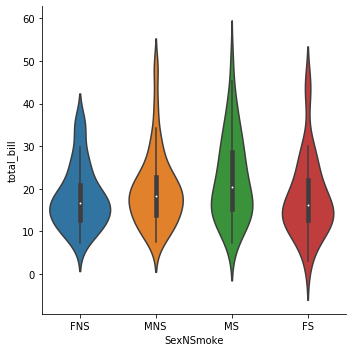

In [19]:
sns.catplot(y='total_bill', x='SexNSmoke', kind='violin', data=tips)
plt.show()

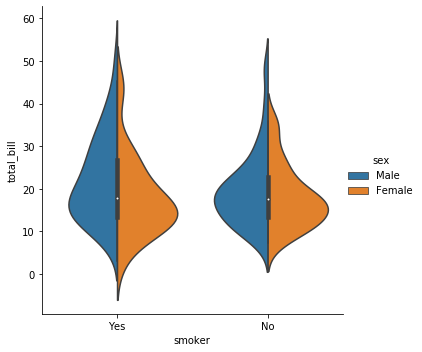

In [26]:
#sns.catplot(y='total_bill',x='sex',hue='smoker',kind='violin', data='tips')
#plt.show()
sns.catplot(x="smoker", y="total_bill", hue="sex",kind="violin", split=True, data=tips);
plt.show()

Looks good, graphwise, though it doesn't look like there is anything particularly noteworthy - both smokers and males both seem to spend slightly more, but by negligible amounts. Now let us compare the other pairs of variables against the money variables and see if anything jumps out. 